Import all libray

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score

Prepare the data training

In [21]:
# Load the data from the CSV file
data = pd.read_csv("extracted_features.csv")

# Extract features and labels
X = data.iloc[:, :-1].values  # Features (all columns except the last one)
y = data.iloc[:, -1].values   # Class labels (the last column)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encode class labels if they are categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Create sequences from the data
sequence_length = 10  # You can choose an appropriate sequence length
num_features = X.shape[1]

# Create sequences and labels
sequences = []
labels = []
for i in range(len(X) - sequence_length + 1):
    sequences.append(X[i:i + sequence_length])
    labels.append(y[i + sequence_length - 1])

X_sequences = np.array(sequences)
y_labels = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_labels, test_size=0.2, random_state=42)


Run the Model

In [22]:
model = keras.Sequential()

# Input layer
model.add(SimpleRNN(units=64, input_shape=(sequence_length, num_features), activation='relu', return_sequences=True))

# First additional hidden layer
model.add(SimpleRNN(units=64, activation='relu', return_sequences=True))

# Dropout layer for regularization
model.add(Dropout(0.5))

# Second additional hidden layer
model.add(SimpleRNN(units=32, activation='relu'))

# Output layer
model.add(Dense(units=np.max(y_labels) + 1, activation='softmax'))  # Assumes y_labels contains class labels

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=32)


Epoch 1/500
36/36 [==============================] - 3s 7ms/step - loss: 2.2291 - accuracy: 0.1364
Epoch 2/500
36/36 [==============================] - 0s 6ms/step - loss: 1.9252 - accuracy: 0.2299
Epoch 3/500
36/36 [==============================] - 0s 7ms/step - loss: 1.6614 - accuracy: 0.3427
Epoch 4/500
36/36 [==============================] - 0s 6ms/step - loss: 1.4423 - accuracy: 0.4309
Epoch 5/500
36/36 [==============================] - 0s 7ms/step - loss: 1.1791 - accuracy: 0.5402
Epoch 6/500
36/36 [==============================] - 0s 6ms/step - loss: 0.9420 - accuracy: 0.6434
Epoch 7/500
36/36 [==============================] - 0s 7ms/step - loss: 0.7818 - accuracy: 0.7247
Epoch 8/500
36/36 [==============================] - 0s 7ms/step - loss: 0.6620 - accuracy: 0.7544
Epoch 9/500
36/36 [==============================] - 0s 6ms/step - loss: 0.5459 - accuracy: 0.8042
Epoch 10/500
36/36 [==============================] - 0s 6ms/step - loss: 0.5117 - accuracy: 0.8173
Epoch 11/

Test the model using training data

In [23]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


9/9 [==============================] - 1s 3ms/step - loss: 0.0064 - accuracy: 0.9965
Test Loss: 0.0064, Test Accuracy: 0.9965


Show The trained model Confusion Matrix

9/9 [==============================] - 0s 3ms/step


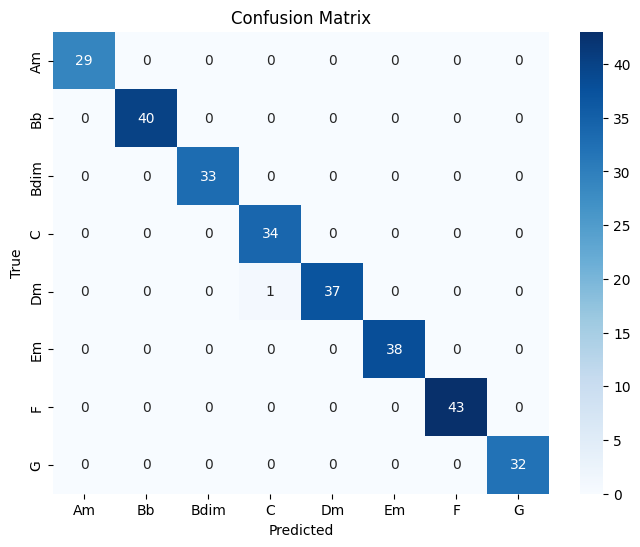

In [24]:
y_pred = model.predict(X_test)

# Convert predictions from one-hot encoded format to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert true class labels to a flat array
y_true = y_test

# Create a confusion matrix
confusion = confusion_matrix(y_true, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Testing model using testing data

Prepare the testing data

In [25]:
newTestingData = pd.read_csv("Testing_Data.csv")

# Normalize features
X_test = newTestingData.iloc[:, :-1].values
X_test = scaler.transform(X_test)

# Encode class labels if they are categorical
y_test = newTestingData.iloc[:, -1].values
y_test = label_encoder.transform(y_test)

sequences_test = []
labels_test = []
for i in range(len(X_test) - sequence_length + 1):
    sequences_test.append(X_test[i:i + sequence_length])
    labels_test.append(y_test[i + sequence_length - 1])

X_sequences_test = np.array(sequences_test)
y_labels_test = np.array(labels_test)

# Calculate predictions for the test data (testing data)
y_pred_test = model.predict(X_sequences_test)

# Convert predictions from one-hot encoded format to class labels
y_pred_labels_test = np.argmax(y_pred_test, axis=1)

6/6 [==============================] - 0s 4ms/step


Test the model using testing data

Show the confusion matrix of testing data

6/6 [==============================] - 0s 5ms/step - loss: 10.9731 - accuracy: 0.1722
Test Loss: 10.9731, Test Accuracy: 0.1722


6/6 [==============================] - 0s 4ms/step


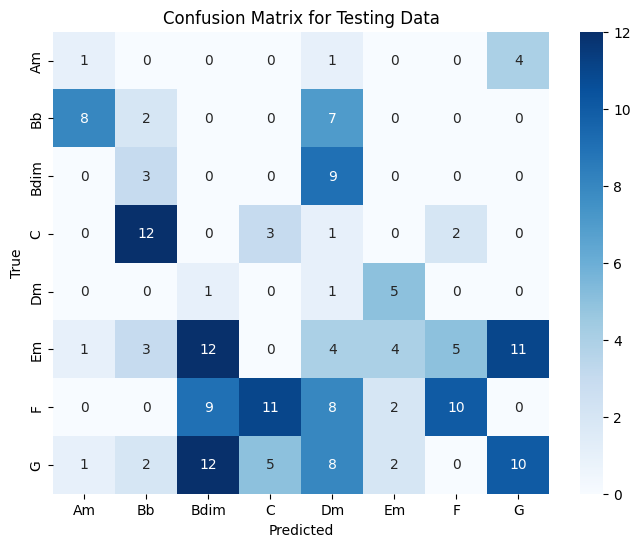

In [26]:
test_loss, test_accuracy = model.evaluate(X_sequences_test, y_labels_test)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Calculate predictions for the test data (testing data)
y_pred_test = model.predict(X_sequences_test)

# Convert predictions from one-hot encoded format to class labels
y_pred_labels_test = np.argmax(y_pred_test, axis=1)

# Create a confusion matrix for the testing data
confusion_test = confusion_matrix(y_labels_test, y_pred_labels_test)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_test, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Testing Data')
plt.show()

In [27]:
precision = precision_score(y_labels_test, y_pred_labels_test, average='weighted', zero_division=1)
recall = recall_score(y_labels_test, y_pred_labels_test, average='weighted', zero_division=1)
f1 = f1_score(y_labels_test, y_pred_labels_test, average='weighted', zero_division=1)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.3164
Recall: 0.1722
F1 Score: 0.2781
